# Project : Movie Rating Prediction

**Objective:** Build a model that predicts the rating of a movie.

Dataset consists of 15509 row and 10 column.

We have to predict the rating of a movie based on following parameters:
1. Genre : Type of movie like Action, Drama, Comedy.
2. Actor : Actors of the movie.
3. Director : Director of the movie.

**Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load Data**

In [2]:
df = pd.read_csv(r"D:\Internship\CodSoft\Project 2\archive (2)\IMDb Movies India.csv", encoding='latin1')

In [3]:
df.head()  # Extract first five rows

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.columns  # Extract column name

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [5]:
df.shape   # cheking the shape

(15509, 10)

In [6]:
df.describe()  # Showing statistical value

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Dataset consist of 15509 rows and 10 column. The column represent the following variables:
1. Name: Name of the movie.
2. Year: Year in which movie released.
3. Duration: Duration of the movie (in min)
4. Genre: Type of movie like Action, Drama, Comedy.
5. Rating: Rating of the movie.
6. Votes: Votes of the movie.
7. Director: Director Name of the movie.
8. Actor 1: First Main Actor in the movie.
9. Actor 2: Second Main Actor in the movie.
10. Actor 3 : Third Main Actor in the movie.

In [8]:
df.isnull()  # checking null values

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [9]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df["Rating"].fillna(df["Rating"].mean(), inplace = True)

In [11]:
df.drop(["Name", "Year"], axis = 1 , inplace = True)

In [12]:
df.isnull().sum()

Duration    8269
Genre       1877
Rating         0
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [13]:
df[['Genre_1', 'Genre_2']] = df['Genre'].str.split(',', 1, expand=True)
df

,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_1,Genre_2
0,NaN,Drama,5.841621,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,None
1,109 min,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None
2,90 min,"Drama, Musical",5.841621,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical
3,110 min,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance
4,105 min,Drama,5.841621,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,None
...,...,...,...,...,...,...,...,...,...,...
15504,NaN,Action,4.600000,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action,None
15505,129 min,"Action, Drama",4.500000,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama
15506,NaN,Action,5.841621,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,Action,None
15507,NaN,Action,5.841621,NaN,NaN,NaN,NaN,NaN,Action,None


In [14]:
df.drop(["Genre"], axis = 1, inplace = True)

In [15]:
df.drop(["Genre_2"], axis = 1, inplace = True)

In [16]:
df.rename(columns = {"Genre_1" : "Genre"}, inplace = True)

In [17]:
df

,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
0,NaN,5.841621,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama
1,109 min,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama
2,90 min,5.841621,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama
3,110 min,4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy
4,105 min,5.841621,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama
...,...,...,...,...,...,...,...,...
15504,NaN,4.600000,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action
15505,129 min,4.500000,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action
15506,NaN,5.841621,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,Action
15507,NaN,5.841621,NaN,NaN,NaN,NaN,NaN,Action


In [18]:
df["Genre"].value_counts()

Drama          4517
Action         3487
Comedy         1561
Thriller        786
Romance         762
Crime           459
Horror          403
Documentary     383
Adventure       252
Fantasy         192
Musical         165
Family          161
Biography       155
Mystery         148
Animation       125
History          29
Music            16
Sport            11
Sci-Fi           10
War               8
Reality-TV        2
Name: Genre, dtype: int64

In [19]:
df

,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
0,NaN,5.841621,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama
1,109 min,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama
2,90 min,5.841621,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama
3,110 min,4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy
4,105 min,5.841621,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama
...,...,...,...,...,...,...,...,...
15504,NaN,4.600000,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action
15505,129 min,4.500000,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action
15506,NaN,5.841621,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,Action
15507,NaN,5.841621,NaN,NaN,NaN,NaN,NaN,Action


In [20]:
df[['Duration (Min)', "Dum"]] = df['Duration'].str.split(' ', 1, expand=True)

In [21]:
df.drop(["Dum"], axis = 1, inplace = True)

In [22]:
df.drop(["Duration"], axis = 1, inplace = True)

In [23]:
df

,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre,Duration (Min)
0,5.841621,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,NaN
1,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,109
2,5.841621,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,90
3,4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,110
4,5.841621,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,105
...,...,...,...,...,...,...,...,...
15504,4.600000,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action,NaN
15505,4.500000,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,129
15506,5.841621,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,Action,NaN
15507,5.841621,NaN,NaN,NaN,NaN,NaN,Action,NaN


In [24]:
df = df.iloc[:, [1, 7, 6, 2, 3, 4, 5, 0]]
df

,Votes,Duration (Min),Genre,Director,Actor 1,Actor 2,Actor 3,Rating
0,NaN,NaN,Drama,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,5.841621
1,8,109,Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000
2,NaN,90,Drama,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,5.841621
3,35,110,Comedy,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000
4,NaN,105,Drama,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,5.841621
...,...,...,...,...,...,...,...,...
15504,11,NaN,Action,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,4.600000
15505,655,129,Action,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,4.500000
15506,NaN,NaN,Action,Kiran Thej,Sangeeta Tiwari,NaN,NaN,5.841621
15507,NaN,NaN,Action,NaN,NaN,NaN,NaN,5.841621


In [25]:
df.isnull().sum()

Votes             7589
Duration (Min)    8269
Genre             1877
Director           525
Actor 1           1617
Actor 2           2384
Actor 3           3144
Rating               0
dtype: int64

In [26]:
from sklearn.preprocessing import OrdinalEncoder
i = df["Director"].unique()
oe_Director = OrdinalEncoder(categories=[i])
df.iloc[:, 3:4] = oe_Director.fit_transform(df.iloc[:, 3:4])

In [27]:
g = df["Genre"].unique()
oe_genre = OrdinalEncoder(categories=[g])
df.iloc[:, 2:3] = oe_genre.fit_transform(df.iloc[:, 2:3])

In [28]:
from sklearn.preprocessing import OrdinalEncoder
a = df["Actor 1"].unique()
oe_a1 = OrdinalEncoder(categories=[a])
df.iloc[:, 4:5] = oe_a1.fit_transform(df.iloc[:, 4:5])

In [29]:
from sklearn.preprocessing import OrdinalEncoder
b = df["Actor 2"].unique()
oe_a2 = OrdinalEncoder(categories=[b])
df.iloc[:, 5:6] = oe_a2.fit_transform(df.iloc[:, 5:6])

In [30]:
from sklearn.preprocessing import OrdinalEncoder
c = df["Actor 3"].unique()
oe_a3 = OrdinalEncoder(categories=[c])
df.iloc[:, 6:7] = oe_a3.fit_transform(df.iloc[:, 6:7])

In [31]:
df

,Votes,Duration (Min),Genre,Director,Actor 1,Actor 2,Actor 3,Rating
0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,5.841621
1,8,109,0.0,1.0,1.0,1.0,1.0,7.000000
2,NaN,90,0.0,2.0,2.0,2.0,2.0,5.841621
3,35,110,1.0,3.0,3.0,3.0,3.0,4.400000
4,NaN,105,0.0,4.0,4.0,4.0,4.0,5.841621
...,...,...,...,...,...,...,...,...
15504,11,NaN,4.0,4487.0,64.0,4403.0,4820.0,4.600000
15505,655,129,4.0,764.0,113.0,1068.0,487.0,4.500000
15506,NaN,NaN,4.0,5938.0,4718.0,NaN,NaN,5.841621
15507,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.841621


In [32]:
df['Votes'] = df['Votes'].str.replace(',',"")

In [33]:
df['Votes'] = df['Votes'].str.replace('M',"")

In [34]:
df['Votes'] = df['Votes'].str.replace('.',"")

In [35]:
df['Votes'] = df['Votes'].str.replace('$',"")

In [36]:
df['Votes'] = df['Votes'].fillna(0)

In [37]:
df.isnull().sum()

Votes                0
Duration (Min)    8269
Genre             1877
Director           525
Actor 1           1617
Actor 2           2384
Actor 3           3144
Rating               0
dtype: int64

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(df.iloc[:, 1:-1])
df.iloc[:,1:-1] = imputer.transform(df.iloc[:,1:-1])

print(df)

      Votes  Duration (Min)  Genre     Director      Actor 1      Actor 2  \
0         0      128.126519    0.0     0.000000     0.000000     0.000000   
1         8      109.000000    0.0     1.000000     1.000000     1.000000   
2         0       90.000000    0.0     2.000000     2.000000     2.000000   
3        35      110.000000    1.0     3.000000     3.000000     3.000000   
4         0      105.000000    0.0     4.000000     4.000000     4.000000   
...     ...             ...    ...          ...          ...          ...   
15504    11      128.126519    4.0  4487.000000    64.000000  4403.000000   
15505   655      129.000000    4.0   764.000000   113.000000  1068.000000   
15506     0      128.126519    4.0  5938.000000  4718.000000  1435.823695   
15507     0      128.126519    4.0  1883.122531  1260.103369  1435.823695   
15508    20      130.000000    4.0   259.000000   184.000000   235.000000   

           Actor 3    Rating  
0         0.000000  5.841621  
1         1.0

In [39]:
df.isnull().sum()

Votes             0
Duration (Min)    0
Genre             0
Director          0
Actor 1           0
Actor 2           0
Actor 3           0
Rating            0
dtype: int64

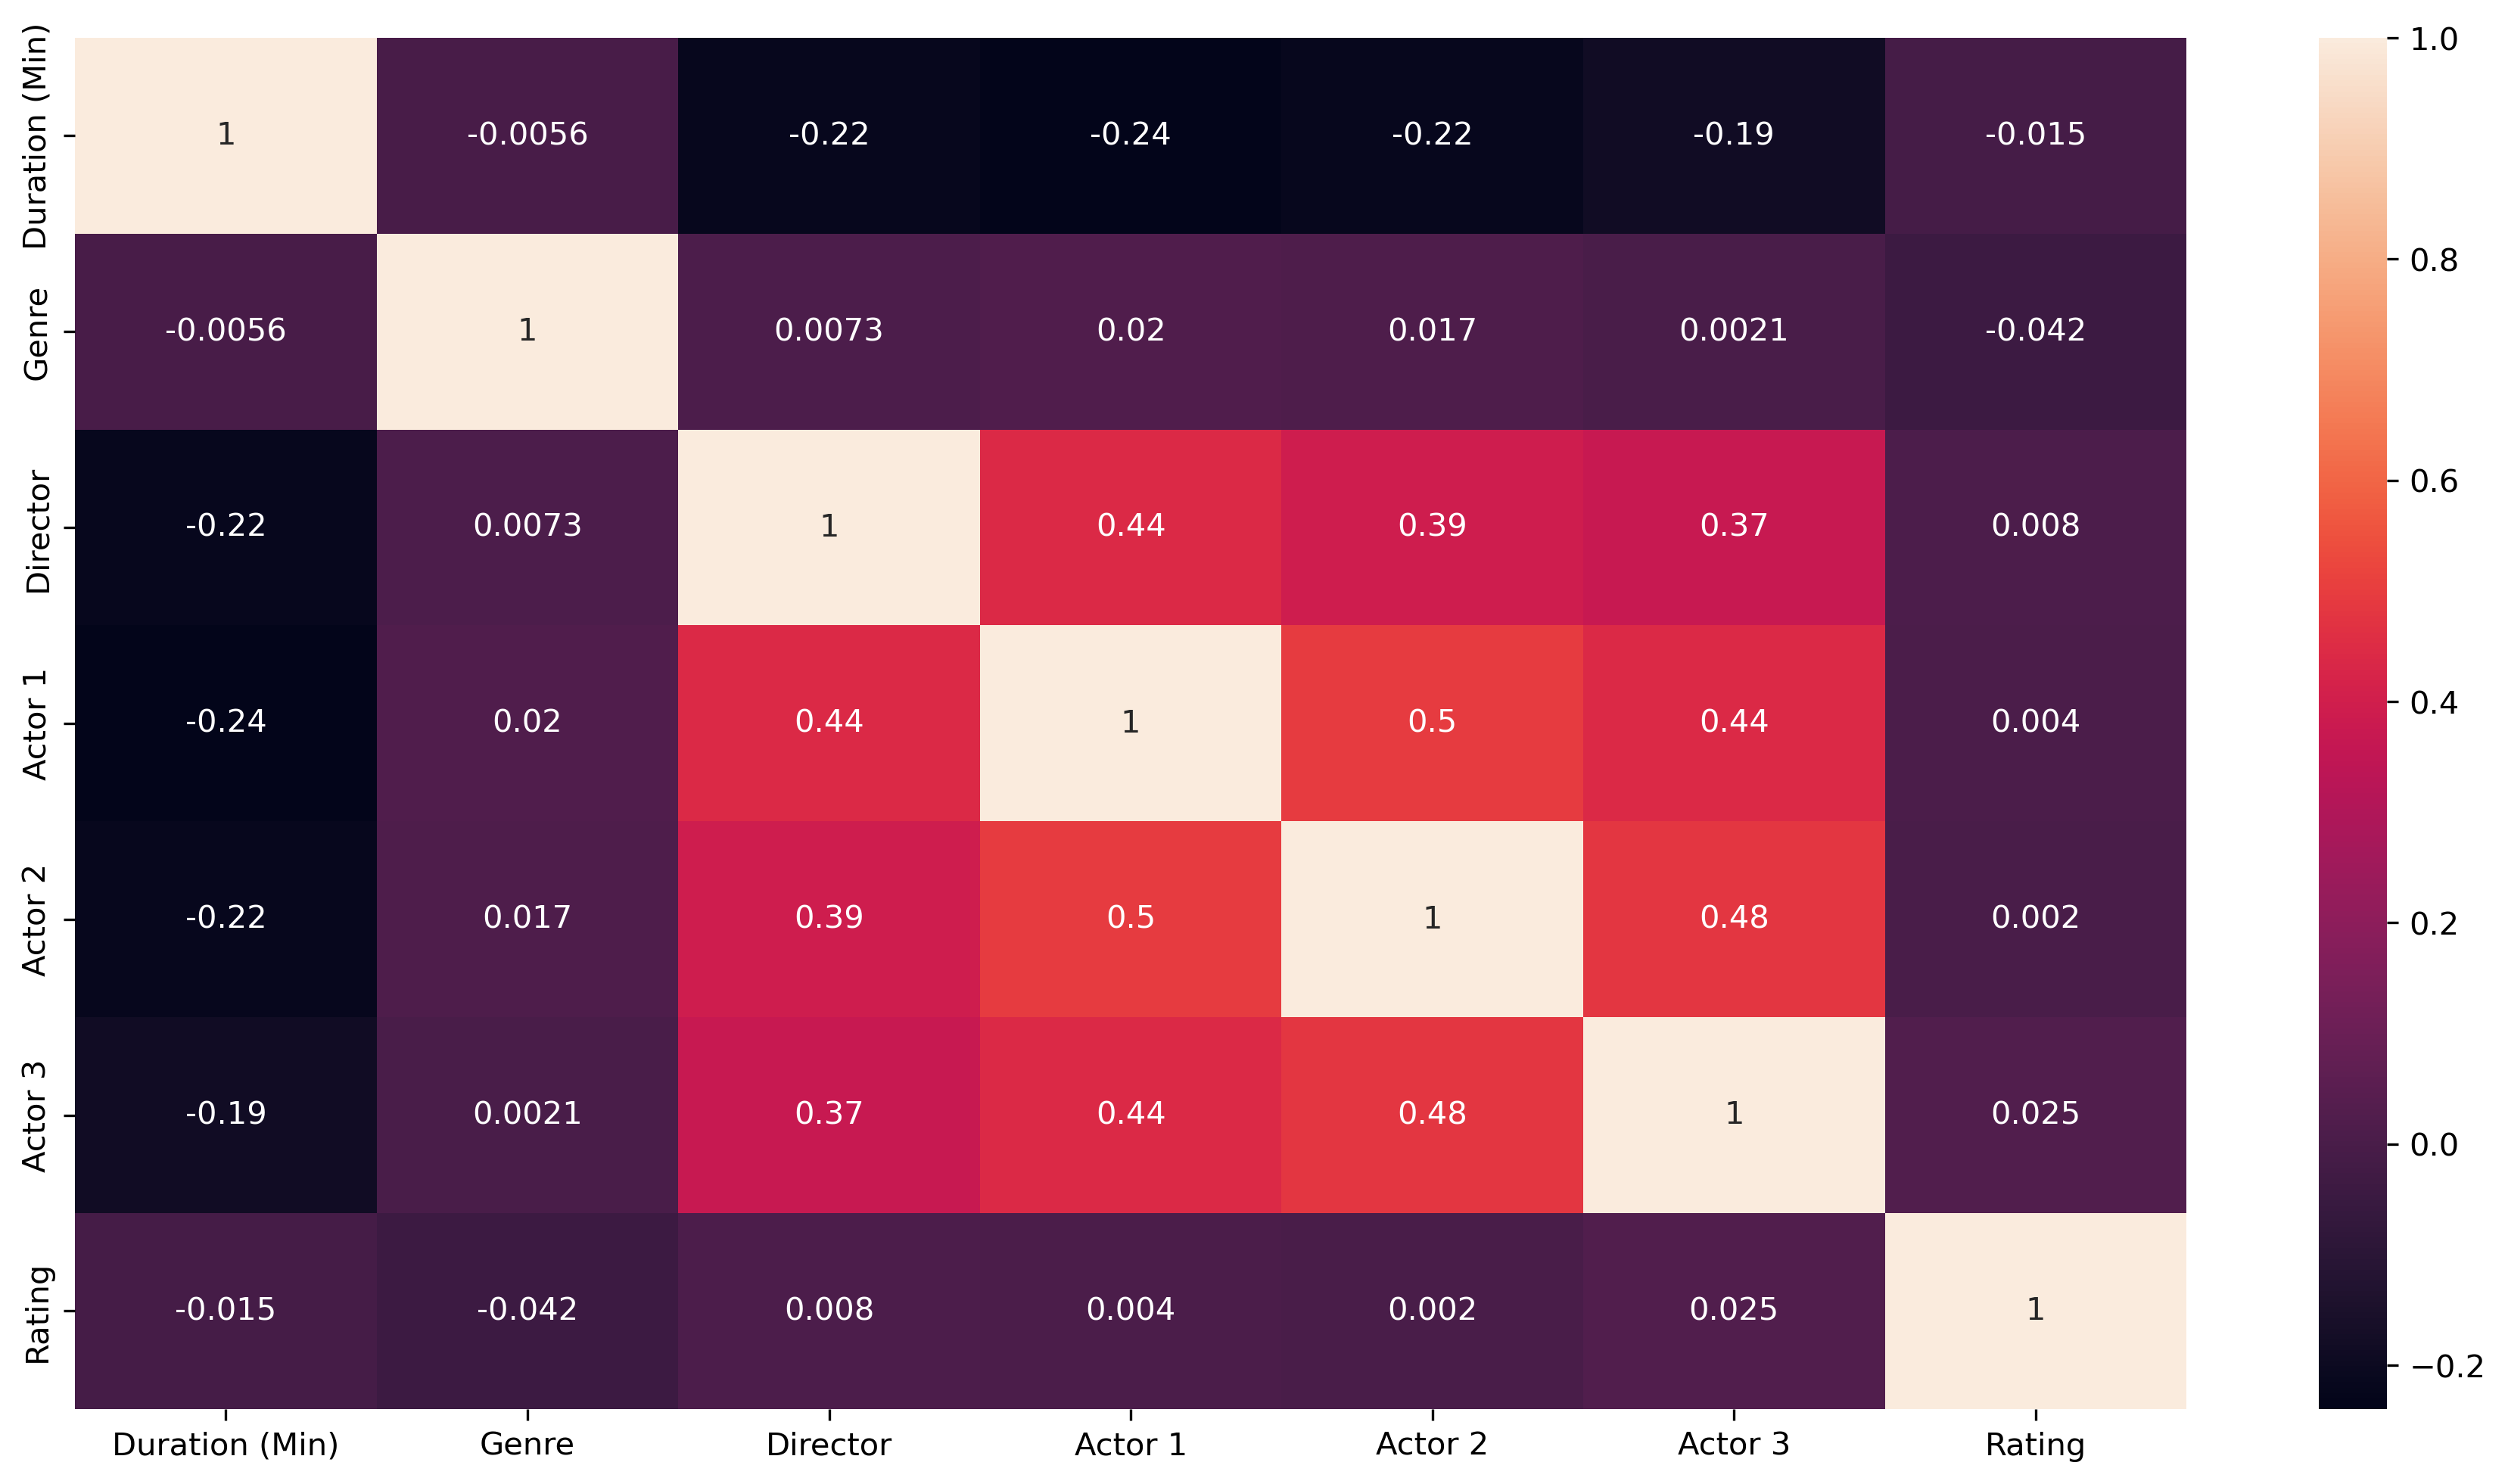

In [40]:
import seaborn as sns
fig=plt.figure(figsize=(15,8),dpi=300)
sns.heatmap(df.corr(), annot = True)
plt.show()

In [41]:
x = df.iloc[:, 0:-1].values  # dependent variable
y = df.iloc[:, -1].values    # independent variable

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [43]:
# applying linear regression model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = regressor.predict(x_test)
print("Predicted Values : \n", y_pred)

Predicted Values : 
 [5.8544182  5.79415947 5.82911481 ... 5.93993713 5.68319212 5.86836049]


In [45]:
# prediction using random values

y_pred1 = regressor.predict([[20, 130, 4, 259, 184, 235, 860]])
print(y_pred1)

[5.83352311]
